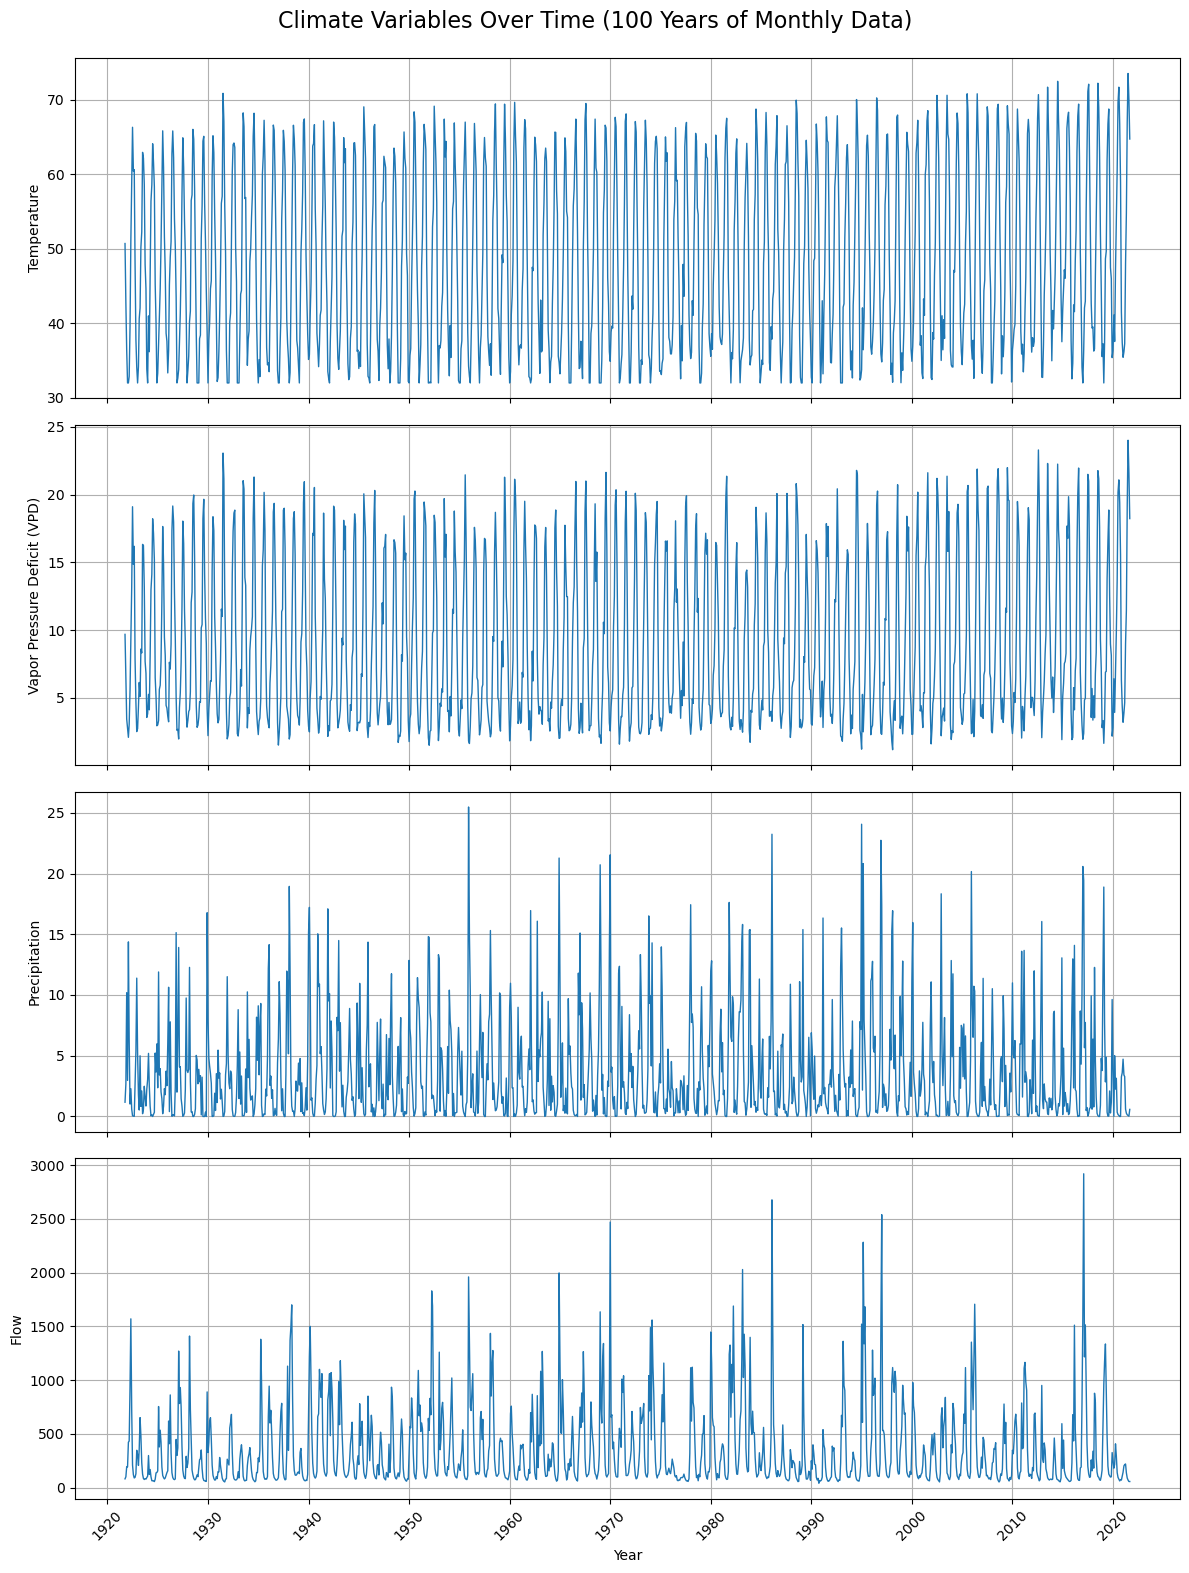


--- Climate Change Analysis ---
Training period: 1921 to 2001
Testing period: 2001 to 2021

Temperature (T):

Vapor Pressure Deficit (VPD) (V):

Precipitation (P):

Flow (F):


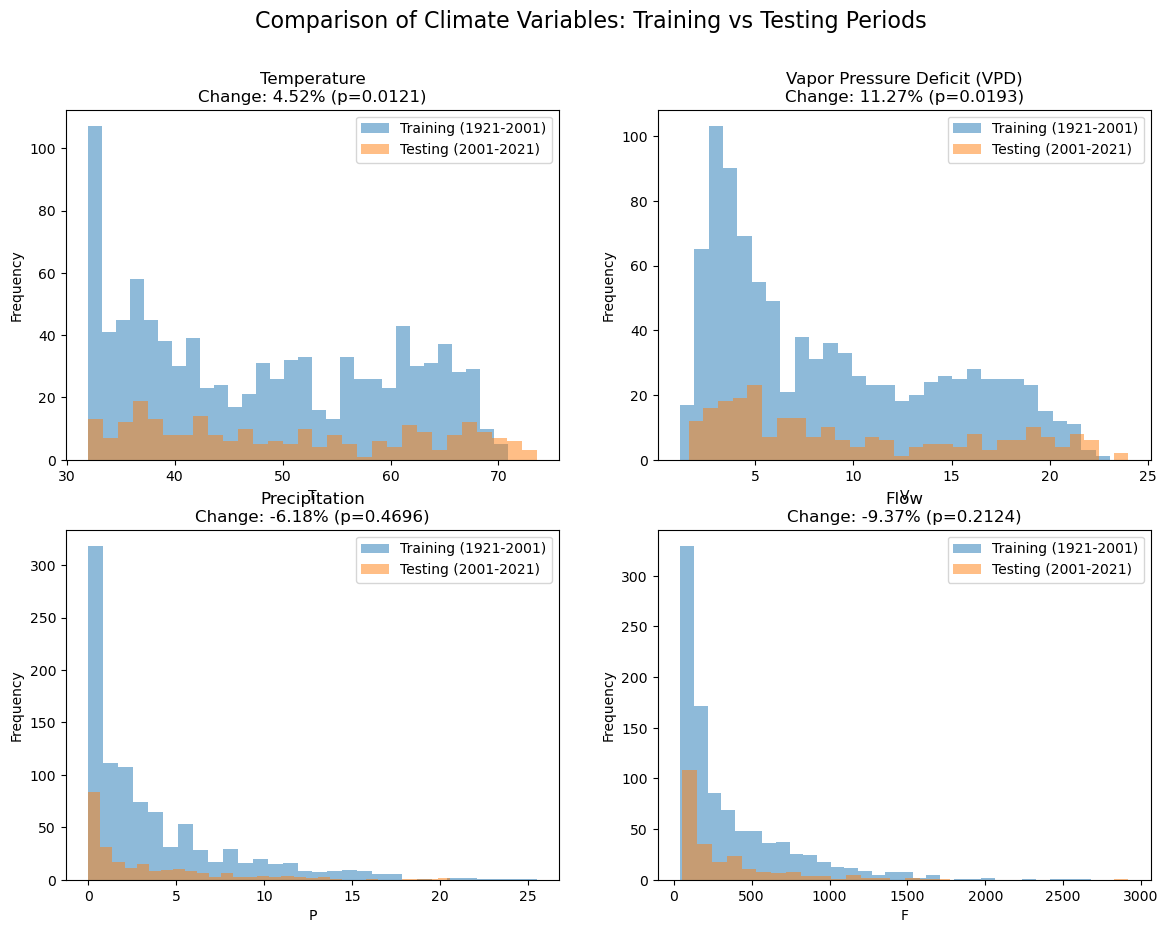

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats

# Read the CSV file
df = pd.read_csv('Data/Clean/Orov_clean.csv')
columns_to_analyze = ['Date','T', 'V', 'P', 'F']
df = df[columns_to_analyze]

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure with 4 subplots (one for each variable)
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
fig.suptitle('Climate Variables Over Time (100 Years of Monthly Data)', fontsize=16)

# Plot each variable
variables = ['T', 'V', 'P', 'F']
titles = ['Temperature', 'Vapor Pressure Deficit (VPD)', 'Precipitation', 'Flow']

for i, (var, title) in enumerate(zip(variables, titles)):
    axes[i].plot(df['Date'], df[var], linewidth=1)
    axes[i].set_ylabel(title)
    axes[i].grid(True)

# Format x-axis to show years properly
axes[3].set_xlabel('Year')
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[3].xaxis.set_major_locator(mdates.YearLocator(10))  # Show every 10 years
plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Display the dataframe
df

# Analyze climate change effects by comparing training (first 80 years) vs test (last 20 years) periods
print("\n--- Climate Change Analysis ---")

# Determine the split point (80% of data)
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

print(f"Training period: {train_df['Date'].min().year} to {train_df['Date'].max().year}")
print(f"Testing period: {test_df['Date'].min().year} to {test_df['Date'].max().year}")

# Create a figure to compare distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Climate Variables: Training vs Testing Periods', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

for i, (var, title) in enumerate(zip(variables, titles)):
    # Calculate statistics
    train_mean = train_df[var].mean()
    test_mean = test_df[var].mean()
    percent_change = ((test_mean - train_mean) / train_mean) * 100
    
    # Perform t-test to check if the difference is statistically significant
    t_stat, p_value = stats.ttest_ind(train_df[var], test_df[var])
    
    # Plot histograms
    axes[i].hist(train_df[var], bins=30, alpha=0.5, label=f'Training ({train_df["Date"].min().year}-{train_df["Date"].max().year})')
    axes[i].hist(test_df[var], bins=30, alpha=0.5, label=f'Testing ({test_df["Date"].min().year}-{test_df["Date"].max().year})')
    axes[i].set_title(f'{title}\nChange: {percent_change:.2f}% (p={p_value:.4f})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    
    # Print detailed statistics
    print(f"\n{title} ({var}):")